In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

ModuleNotFoundError: No module named 'numpy'

In [2]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

In [3]:
X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0

In [4]:
X_val, y_val = X_train[50000:], y_train[50000:]
X_train, y_train = X_train[:50000], y_train[:50000]

In [5]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(256,activation='relu',kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
checkpoint = ModelCheckpoint(filepath="best_model_sparse.h5",
                             monitor="val_loss",save_best_only=True,mode="min",verbose=1)

In [9]:
es = EarlyStopping(monitor="val_loss",
                   patience=5,restore_best_weights=True)

In [10]:
lr_scheduler = ReduceLROnPlateau(monitor="val_loss",
                                 factor=0.5,patience=2,verbose=1)

In [11]:
history=model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=50,batch_size=64,verbose=1,callbacks=[checkpoint,es,lr_scheduler])

Epoch 1/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7630 - loss: 1.1748
Epoch 1: val_loss improved from inf to 0.43276, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7633 - loss: 1.1739 - val_accuracy: 0.9589 - val_loss: 0.4328 - learning_rate: 0.0010
Epoch 2/50
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9263 - loss: 0.5266
Epoch 2: val_loss improved from 0.43276 to 0.33939, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9263 - loss: 0.5263 - val_accuracy: 0.9659 - val_loss: 0.3394 - learning_rate: 0.0010
Epoch 3/50
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9405 - loss: 0.4186
Epoch 3: val_loss improved from 0.33939 to 0.30552, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9405 - loss: 0.4185 - val_accuracy: 0.9635 - val_loss: 0.3055 - learning_rate: 0.0010
Epoch 4/50
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9411 - loss: 0.3760
Epoch 4: val_loss improved from 0.30552 to 0.27756, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9411 - loss: 0.3759 - val_accuracy: 0.9662 - val_loss: 0.2776 - learning_rate: 0.0010
Epoch 5/50
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9469 - loss: 0.3374
Epoch 5: val_loss improved from 0.27756 to 0.25512, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9469 - loss: 0.3374 - val_accuracy: 0.9687 - val_loss: 0.2551 - learning_rate: 0.0010
Epoch 6/50
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9496 - loss: 0.3224
Epoch 6: val_loss improved from 0.25512 to 0.24520, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9496 - loss: 0.3224 - val_accuracy: 0.9709 - val_loss: 0.2452 - learning_rate: 0.0010
Epoch 7/50
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9498 - loss: 0.3161
Epoch 7: val_loss did not improve from 0.24520
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9498 - loss: 0.3162 - val_accuracy: 0.9703 - val_loss: 0.2518 - learning_rate: 0.0010
Epoch 8/50
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9522 - loss: 0.3022
Epoch 8: val_loss improved from 0.24520 to 0.23409, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9522 - loss: 0.3022 - val_accuracy: 0.9716 - val_loss: 0.2341 - learning_rate: 0.0010
Epoch 9/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9531 - loss: 0.2974
Epoch 9: val_loss improved from 0.23409 to 0.23363, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9530 - loss: 0.2974 - val_accuracy: 0.9710 - val_loss: 0.2336 - learning_rate: 0.0010
Epoch 10/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9528 - loss: 0.2935
Epoch 10: val_loss improved from 0.23363 to 0.22714, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9528 - loss: 0.2935 - val_accuracy: 0.9725 - val_loss: 0.2271 - learning_rate: 0.0010
Epoch 11/50
778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9537 - loss: 0.2854
Epoch 11: val_loss did not improve from 0.22714
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9537 - loss: 0.2854 - val_accuracy: 0.9698 - val_loss: 0.2344 - learning_rate: 0.0010
Epoch 12/50
777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9555 - loss: 0.2822
Epoch 12: val_loss did not improve from 0.22714

Epoch 12: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9555 - loss: 0.2822 - val_accuracy: 0.9662 - val_loss: 0.2453 - learning_rate: 0.0010
Epoch 13/50
777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9604 - loss: 0.2588
Epoch 13: val_loss improved from 0.22714 to 0.18504, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9604 - loss: 0.2587 - val_accuracy: 0.9766 - val_loss: 0.1850 - learning_rate: 5.0000e-04
Epoch 14/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9653 - loss: 0.2225
Epoch 14: val_loss improved from 0.18504 to 0.17304, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9653 - loss: 0.2225 - val_accuracy: 0.9777 - val_loss: 0.1730 - learning_rate: 5.0000e-04
Epoch 15/50
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9686 - loss: 0.2066
Epoch 15: val_loss improved from 0.17304 to 0.16543, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9686 - loss: 0.2066 - val_accuracy: 0.9782 - val_loss: 0.1654 - learning_rate: 5.0000e-04
Epoch 16/50
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9678 - loss: 0.1999
Epoch 16: val_loss did not improve from 0.16543
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9678 - loss: 0.2000 - val_accuracy: 0.9769 - val_loss: 0.1656 - learning_rate: 5.0000e-04
Epoch 17/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9675 - loss: 0.2000
Epoch 17: val_loss improved from 0.16543 to 0.16519, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9675 - loss: 0.2000 - val_accuracy: 0.9757 - val_loss: 0.1652 - learning_rate: 5.0000e-04
Epoch 18/50
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9672 - loss: 0.1981
Epoch 18: val_loss did not improve from 0.16519
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.9672 - loss: 0.1981 - val_accuracy: 0.9751 - val_loss: 0.1678 - learning_rate: 5.0000e-04
Epoch 19/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9684 - loss: 0.1929
Epoch 19: val_loss improved from 0.16519 to 0.15686, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9684 - loss: 0.1929 - val_accuracy: 0.9780 - val_loss: 0.1569 - learning_rate: 5.0000e-04
Epoch 20/50
778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9675 - loss: 0.1872
Epoch 20: val_loss improved from 0.15686 to 0.15313, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9675 - loss: 0.1872 - val_accuracy: 0.9796 - val_loss: 0.1531 - learning_rate: 5.0000e-04
Epoch 21/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9680 - loss: 0.1895
Epoch 21: val_loss did not improve from 0.15313
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9680 - loss: 0.1895 - val_accuracy: 0.9759 - val_loss: 0.1570 - learning_rate: 5.0000e-04
Epoch 22/50
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9684 - loss: 0.1856
Epoch 22: val_loss did not improve from 0.15313

Epoch 22: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9683 - loss: 0.1857 - val_accuracy: 0.9776 - val_loss: 0.1556 - learning_rate: 5.0000e-04
Epoch 23/50
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9715 - loss: 0.1722
Epoch 23: val_loss improved from 0.15313 to 0.14018, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9715 - loss: 0.1722 - val_accuracy: 0.9815 - val_loss: 0.1402 - learning_rate: 2.5000e-04
Epoch 24/50
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9768 - loss: 0.1497
Epoch 24: val_loss improved from 0.14018 to 0.13757, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9768 - loss: 0.1497 - val_accuracy: 0.9814 - val_loss: 0.1376 - learning_rate: 2.5000e-04
Epoch 25/50
777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9772 - loss: 0.1444
Epoch 25: val_loss improved from 0.13757 to 0.12986, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9772 - loss: 0.1444 - val_accuracy: 0.9822 - val_loss: 0.1299 - learning_rate: 2.5000e-04
Epoch 26/50
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9782 - loss: 0.1387
Epoch 26: val_loss did not improve from 0.12986
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9782 - loss: 0.1387 - val_accuracy: 0.9808 - val_loss: 0.1349 - learning_rate: 2.5000e-04
Epoch 27/50
778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9781 - loss: 0.1349
Epoch 27: val_loss did not improve from 0.12986

Epoch 27: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9781 - loss: 0.1350 - val_accuracy: 0.9801 - val_loss: 0.1323 - learning_rate: 2.5000e-04
Epoch 28/50
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9813 - loss: 0.1238
Epoch 28: val_loss improved from 0.12986 to 0.12189, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9813 - loss: 0.1238 - val_accuracy: 0.9836 - val_loss: 0.1219 - learning_rate: 1.2500e-04
Epoch 29/50
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9830 - loss: 0.1156
Epoch 29: val_loss improved from 0.12189 to 0.11975, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9830 - loss: 0.1156 - val_accuracy: 0.9830 - val_loss: 0.1198 - learning_rate: 1.2500e-04
Epoch 30/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9835 - loss: 0.1098
Epoch 30: val_loss improved from 0.11975 to 0.11556, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9835 - loss: 0.1098 - val_accuracy: 0.9844 - val_loss: 0.1156 - learning_rate: 1.2500e-04
Epoch 31/50
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9837 - loss: 0.1091
Epoch 31: val_loss improved from 0.11556 to 0.11522, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9837 - loss: 0.1091 - val_accuracy: 0.9837 - val_loss: 0.1152 - learning_rate: 1.2500e-04
Epoch 32/50
777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9852 - loss: 0.1013
Epoch 32: val_loss improved from 0.11522 to 0.11206, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9852 - loss: 0.1013 - val_accuracy: 0.9849 - val_loss: 0.1121 - learning_rate: 1.2500e-04
Epoch 33/50
778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9838 - loss: 0.1029
Epoch 33: val_loss did not improve from 0.11206
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9838 - loss: 0.1029 - val_accuracy: 0.9832 - val_loss: 0.1134 - learning_rate: 1.2500e-04
Epoch 34/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9846 - loss: 0.1007
Epoch 34: val_loss improved from 0.11206 to 0.11136, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9846 - loss: 0.1007 - val_accuracy: 0.9832 - val_loss: 0.1114 - learning_rate: 1.2500e-04
Epoch 35/50
777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9862 - loss: 0.0944
Epoch 35: val_loss improved from 0.11136 to 0.10929, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9862 - loss: 0.0944 - val_accuracy: 0.9831 - val_loss: 0.1093 - learning_rate: 1.2500e-04
Epoch 36/50
777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9850 - loss: 0.0950
Epoch 36: val_loss did not improve from 0.10929
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9850 - loss: 0.0950 - val_accuracy: 0.9828 - val_loss: 0.1100 - learning_rate: 1.2500e-04
Epoch 37/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9854 - loss: 0.0929
Epoch 37: val_loss did not improve from 0.10929

Epoch 37: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9854 - loss: 0.0929 - val_accuracy: 0.9830 - val_loss: 0.1118 - learning_rate: 1.2500e-04
Epoch 38/50
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9866 - loss: 0.0888
Epoch 38: val_loss improved from 0.10929 to 0.10531, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9866 - loss: 0.0888 - val_accuracy: 0.9845 - val_loss: 0.1053 - learning_rate: 6.2500e-05
Epoch 39/50
778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9872 - loss: 0.0880
Epoch 39: val_loss improved from 0.10531 to 0.10425, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9872 - loss: 0.0880 - val_accuracy: 0.9846 - val_loss: 0.1042 - learning_rate: 6.2500e-05
Epoch 40/50
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9894 - loss: 0.0787
Epoch 40: val_loss improved from 0.10425 to 0.10387, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9894 - loss: 0.0787 - val_accuracy: 0.9846 - val_loss: 0.1039 - learning_rate: 6.2500e-05
Epoch 41/50
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9874 - loss: 0.0814
Epoch 41: val_loss did not improve from 0.10387
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9874 - loss: 0.0814 - val_accuracy: 0.9844 - val_loss: 0.1045 - learning_rate: 6.2500e-05
Epoch 42/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9873 - loss: 0.0830
Epoch 42: val_loss did not improve from 0.10387

Epoch 42: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9873 - loss: 0.0829 - val_accuracy: 0.9837 - val_loss: 0.1060 - learning_rate: 6.2500e-05
Epoch 43/50
777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9880 - loss: 0.0802
Epoch 43: val_loss did not improve from 0.10387
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9880 - loss: 0.0802 - va

782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9902 - loss: 0.0733 - val_accuracy: 0.9848 - val_loss: 0.1036 - learning_rate: 3.1250e-05
Epoch 45/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9897 - loss: 0.0741
Epoch 45: val_loss did not improve from 0.10359
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9897 - loss: 0.0741 - val_accuracy: 0.9843 - val_loss: 0.1048 - learning_rate: 3.1250e-05
Epoch 46/50
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9902 - loss: 0.0729
Epoch 46: val_loss improved from 0.10359 to 0.10339, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9902 - loss: 0.0729 - val_accuracy: 0.9850 - val_loss: 0.1034 - learning_rate: 3.1250e-05
Epoch 47/50
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9899 - loss: 0.0709
Epoch 47: val_loss improved from 0.10339 to 0.10318, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9899 - loss: 0.0709 - val_accuracy: 0.9848 - val_loss: 0.1032 - learning_rate: 3.1250e-05
Epoch 48/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9897 - loss: 0.0703
Epoch 48: val_loss improved from 0.10318 to 0.10202, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9897 - loss: 0.0703 - val_accuracy: 0.9857 - val_loss: 0.1020 - learning_rate: 3.1250e-05
Epoch 49/50
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9908 - loss: 0.0712
Epoch 49: val_loss improved from 0.10202 to 0.10138, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9908 - loss: 0.0712 - val_accuracy: 0.9861 - val_loss: 0.1014 - learning_rate: 3.1250e-05
Epoch 50/50
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9910 - loss: 0.0667
Epoch 50: val_loss improved from 0.10138 to 0.10125, saving model to best_model_sparse.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9910 - loss: 0.0667 - val_accuracy: 0.9848 - val_loss: 0.1012 - learning_rate: 3.1250e-05


In [12]:
loss,acc=model.evaluate(X_test,y_test,verbose=2)
print(f"Test Accuracy: {acc:.4f}, Test Loss: {loss:.4f}")

313/313 - 1s - 3ms/step - accuracy: 0.9838 - loss: 0.1020
Test Accuracy: 0.9838, Test Loss: 0.1020


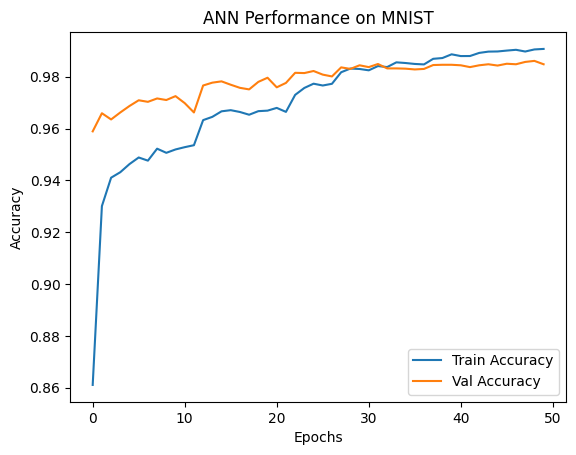

In [13]:
plt.plot(history.history["accuracy"],label="Train Accuracy")
plt.plot(history.history["val_accuracy"],label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("ANN Performance on MNIST")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


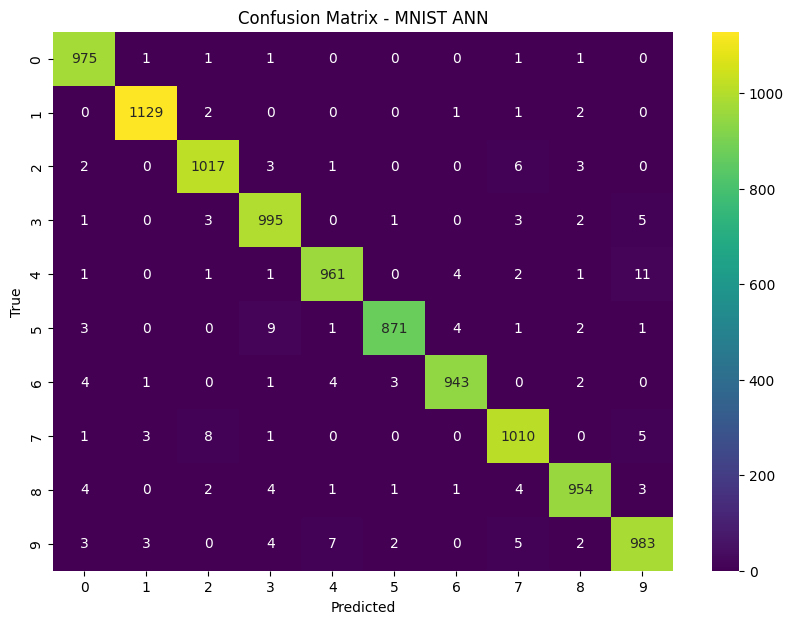

In [15]:
y_pred = model.predict(X_test)
y_pred_classes=np.argmax(y_pred, axis=1)

cm=confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - MNIST ANN")
plt.show()

In [16]:
print("\nClassificatipon Report: \n")
print(classification_report(y_test, y_pred_classes))


Classificatipon Report: 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



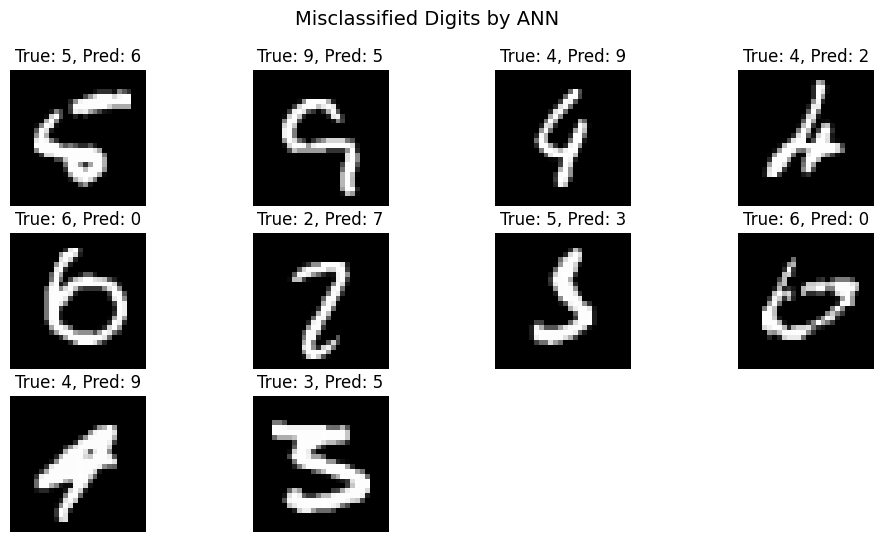

In [17]:
misclassified_idx= np.where(y_pred_classes != y_test)[0]

plt.figure(figsize=(12,6))
for i, idx in enumerate(misclassified_idx[:10]):
  plt.subplot(3,4,i+1)
  plt.imshow(X_test[idx],cmap="gray")
  plt.title(f"True: {y_test[idx]}, Pred: {y_pred_classes[idx]}")
  plt.axis("off")
plt.suptitle("Misclassified Digits by ANN", fontsize=14)
plt.show()